## Setup ##

In [1]:
"""Display examples of each type of augmentation and how to use Augmentor"""
import sys; sys.path.append('/usr/people/kluther/seungmount/research/kluther/augment3d/augment/')
import tifffile
import os
import matplotlib.pyplot as plt
import numpy as np

import augment
import blur
import circle
import elastic_warp
import flip
import misalign
import missing_section
import rescale
import rotate90

%load_ext autoreload
%autoreload 2

In [22]:
data_dir = '/usr/people/kluther/seungmount/research/kluther/data/ISBI_SEGMENTS/train/'
volume = np.expand_dims(tifffile.imread(os.path.join(data_dir, 'volume.tif')), -1)
labels = np.expand_dims(tifffile.imread(os.path.join(data_dir, 'labels.tif')), -1)

print('volume shape: {}'.format(volume.shape))
print('labels shape: {}'.format(labels.shape))

volume shape: (20, 512, 512, 1)
labels shape: (20, 512, 512, 1)


## Augmentor ##

In [3]:
""" General use of augmentation:
>>> augmentor = Augmentor(params)
>>> img, [label1, label2, ...] = augmentor.augment(img, [label1, label2, ...])
"""
params = {'rot90': True}
augmentor = augment.Augmentor(params)
img_batch = [volume[5*i:5*(i+1)] for i in range(2)]
label_batch = [labels[5*i:5*(i+1)] for i in range(2)]
augmented_img_batch = []
augmented_label_batch = []

for img, label in zip(img_batch, label_batch):
    augmented_img, [augmented_label] = augmentor.augment(img, [label])
    augmented_img_batch.append(augmented_img)
    augmented_label_batch.append(augmented_label)

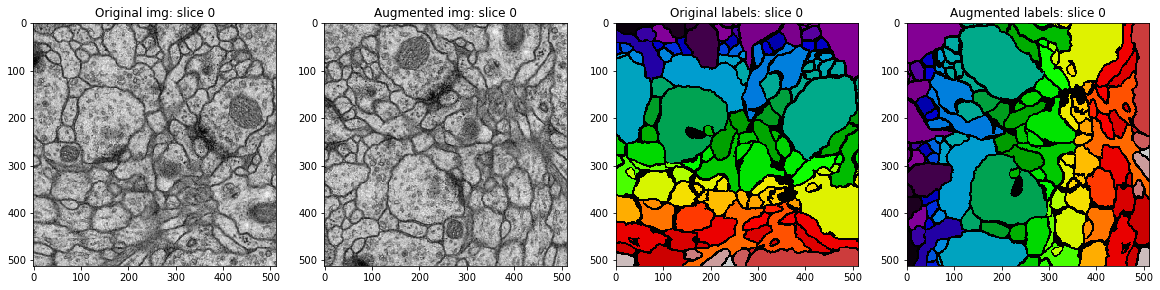

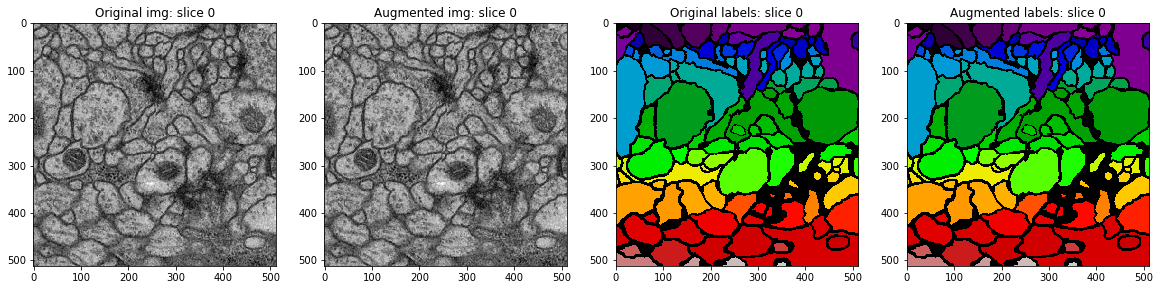

In [4]:
imgs = zip(img_batch, augmented_img_batch, label_batch, augmented_label_batch)
for img, augmented_img, label, augmented_label in imgs:
    plt.figure(figsize=(20,5))
    
    plt.subplot(141)
    plt.title('Original img: slice 0')
    plt.imshow(np.squeeze(img[0]), cmap='gray')
    
    plt.subplot(142)
    plt.title('Augmented img: slice 0')
    plt.imshow(np.squeeze(augmented_img[0]), cmap='gray')
    
    
    plt.subplot(143)
    plt.title('Original labels: slice 0')
    plt.imshow(np.squeeze(label[0]), cmap='nipy_spectral')
    
    
    plt.subplot(144)
    plt.title('Augmented labels: slice 0')
    plt.imshow(np.squeeze(augmented_label[0]), cmap='nipy_spectral')
    plt.show()

## Blur ##

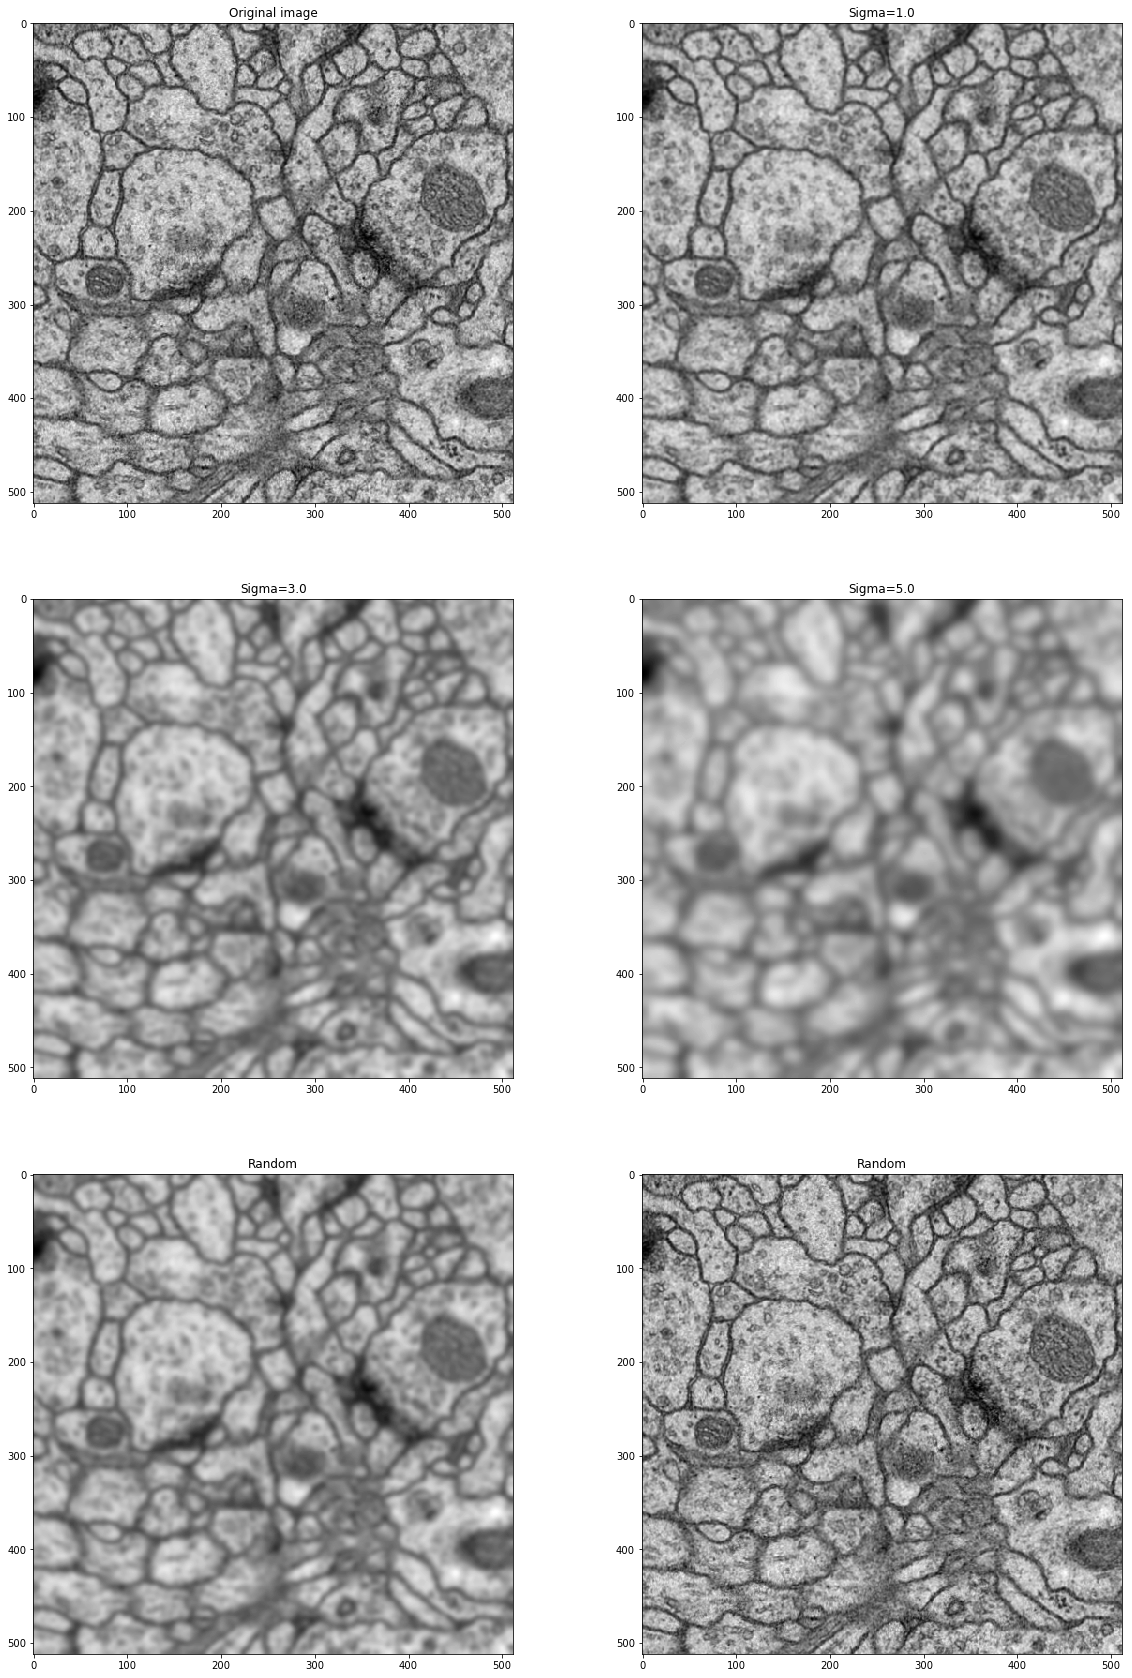

In [33]:
img = volume[0:2]
sigmas = [1.0,3.0,5.0]

# Fixed
augmented_imgs_fixed = []
for sigma in sigmas:
    augmented_imgs_fixed.append(blur.gaussian_filter(img[0], sigma))
    
# Random
augmented_imgs_rnd = []
sigma = 5.0
p = 0.5
for i in range(2):
    augmented_imgs_rnd.append(blur.blur_augment(img, sigma, p))
    
# Plot
plt.figure(figsize=(20,30))
plt.subplot(321)
plt.title('Original image')
plt.imshow(np.squeeze(img[0]), cmap='gray')

plt.subplot(322)
plt.title('Sigma={}'.format(sigmas[0]))
plt.imshow(np.squeeze(augmented_imgs_fixed[0]), cmap='gray')

plt.subplot(323)
plt.title('Sigma={}'.format(sigmas[1]))
plt.imshow(np.squeeze(augmented_imgs_fixed[1]), cmap='gray')

plt.subplot(324)
plt.title('Sigma={}'.format(sigmas[2]))
plt.imshow(np.squeeze(augmented_imgs_fixed[2]), cmap='gray')

plt.subplot(325)
plt.title('Random')
plt.imshow(np.squeeze(augmented_imgs_rnd[0][0]), cmap='gray')

plt.subplot(326)
plt.title('Random')
plt.imshow(np.squeeze(augmented_imgs_rnd[1][0]), cmap='gray')

plt.show()


## Circle ##

[486 486 486 486 486 486 486 486 486 486 486 487 487 487 487 487 487 487
 487 487 487 487 487 487 487 487 488 488 488 488 488 488 488 488 488 488
 488 488 488 488 488 488 488 489 489 489 489 489 489 489 489 489 489 489
 489 489 489 489 489 489 489 489 489 489 490 490 490 490 490 490 490 490
 490 490 490 490 490 490 490 490 490 490 490 490 490 490 490 491 491 491
 491 491 491 491 491 491 491 491 491 491 491 491 491 491 491 491 491 491
 491 491 492 492 492 492 492 492 492 492 492 492 492 492 492 492 492 492
 492 492 492 492 492 492 492 492 492 493 493 493 493 493 493 493 493 493
 493 493 493 493 493 493 493 493 493 493 493 493 493 493 493 493 493 493
 494 494 494 494 494 494 494 494 494 494 494 494 494 494 494 494 494 494
 494 494 494 494 494 494 494 494 494 495 495 495 495 495 495 495 495 495
 495 495 495 495 495 495 495 495 495 495 495 495 495 495 495 495 495 495
 495 495 496 496 496 496 496 496 496 496 496 496 496 496 496 496 496 496
 496 496 496 496 496 496 496 496 496 496 496 496 49

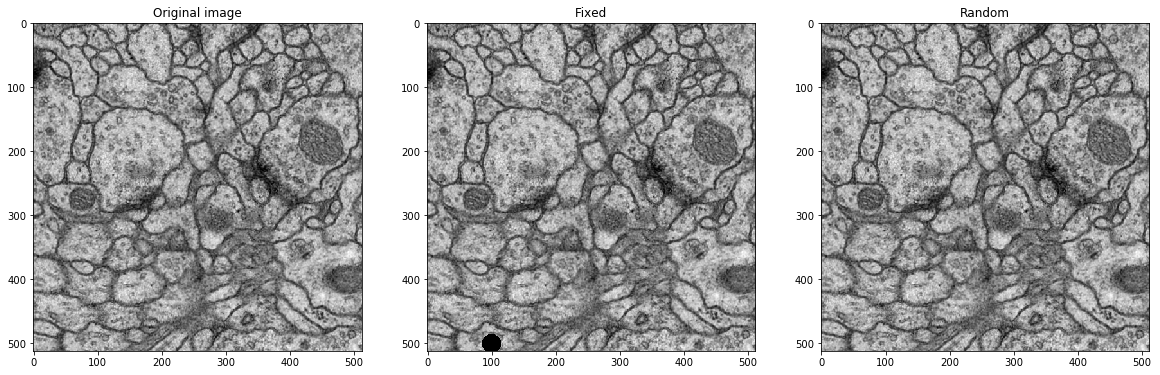

In [38]:
img = volume[0:2]

# Fixed
r = 15
zc, yc, xc = (0, 100, 100)
yy, xx = circle.circle(yc, xc, r, shape=(512,512))
img_fixed = np.copy(img)
img_fixed[zc, yy, xx, :] = 0.0

# Random
p = 0.5
max_r = 50
img_random = circle.circle_augment(img, p, max_r)

# Plot
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('Original image')
plt.imshow(np.squeeze(img[0]), cmap='gray')

plt.subplot(132)
plt.title('Fixed')
plt.imshow(np.squeeze(img_fixed[0]), cmap='gray')

plt.subplot(133)
plt.title('Random')
plt.imshow(np.squeeze(img_random[0]), cmap='gray')

plt.show()

## Elastic Warp ##

In [ ]:
img = volume[0:2]
labels = labels[0:2]